# kNN-k近邻算法
k-Nearest Neighbors

## 概述
* 思想极度简单
* 应用数学知识少（几乎为零）
* 效果好（缺点？）
* 可以解释机器学习算法使用过程中的很多细节问题
* 更完整的刻画机器学习应用的流程
### 特点
* k邻近算法是非常特殊的，可以被认为是没有模型的算法
* 为了和其它算法统计，可以认为训练数据集就是模型本身
### 案例

In [1]:
import numpy as np
import matplotlib.pyplot as plt
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [2]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [3]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [4]:
x = np.array([8.093607318, 3.365731514])

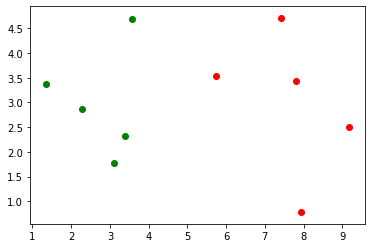

In [5]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

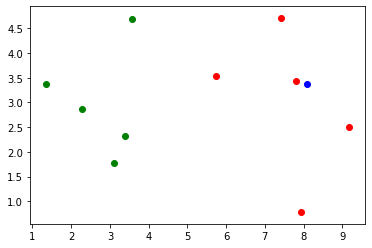

In [6]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

## kNN的过程
### 欧拉距离
$$\sqrt{} $$

### 立体几何距离
$$\sqrt{} $$

### n位空间距离
$$\sqrt{} $$

简洁表示
$$ \sqrt{} $$

In [7]:
from math import sqrt
distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]

In [8]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [9]:
from collections import Counter

nearest = np.argsort(distances)
k = 6
topK_y = [y_train[i] for i in nearest[:k]]
votes = Counter(topK_y)
predict_y = votes.most_common(1)[0][0]

## scikit-learn中的机器学习算法封装

In [10]:
import numpy as np
import matplotlib.pyplot as plt
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
x = np.array([8.093607318, 3.365731514])

In [11]:
%run kNN.py

In [12]:
from kNN import kNN_classify
predict_y = kNN_classify(6, X_train, y_train, x)
predict_y

1

### 使用scikit-learn中的knn

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors=6)
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [14]:
x = np.array([8.093607318, 3.365731514])
y_predict = kNN_classifier.predict(x.reshape(1,-1))
y_predict[0]

1

In [15]:
%run kNN.py

In [16]:
from kNN import KNNClassifier
knn_clf = KNNClassifier(k=6)

knn_clf.fit(X_train, y_train)

KNN(k=6)

In [17]:
y_predict = knn_clf.predict(x.reshape(1,-1))
y_predict

array([1])

## 判断机器学习算法的性能
* 训练得到的模型直接在真实环境中使用

#### 问题
* 模型很差怎么办？真实损失
* 真实环境难易拿到真实label？

### train test split 
* 通过测试数据直接判断模型好坏
* 在模型进入真实环境前改进模型

（问题？后续分解）

### 测试我们的算法

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [19]:
y.shape

(150,)

### train_test_split

In [20]:
shuffle_indexes = np.random.permutation(len(X))
shuffle_indexes

array([140,  72,  20, 149,  88,  39, 148, 129,  82,  57,  46, 125, 100,
        29,  90,  11,  66,  55, 117,  61, 105,  37, 132,  12, 141, 146,
        27,  40,  75,  13,  68,  15, 113,  21,  52, 128,  32,  73,  60,
        16,  35,   3,  53,  76, 112, 116,  49,  23, 109, 144,  62,  24,
       124,  94, 130,  58, 104,  70, 106,  47, 121,  50,  30,  85,  67,
        28, 111, 108, 115,  92,  77,  80,  71,  65,  43,  97,  19,   5,
        42,  96, 138, 139,  63, 120,  87,   1,  99,  44,  38,  81, 137,
        45, 102,  36,  84,  83,  95,   2,  86, 110,   8,  33,  31,  54,
       126,   6,  10,  22,   0, 101, 147, 122,  17, 143, 123,   4,  26,
        98,  78, 119, 107,  59, 135,  91, 133,  51, 142,  69,   9,  74,
       134,  48, 136, 118, 131,  18,  34,  56,  64,   7,  14, 127, 145,
        25,  41,  93,  79, 103,  89, 114])

In [21]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [22]:
test_size

30

In [23]:
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

In [24]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


### 使用我们的算法

In [26]:
%run model_selection.py

In [27]:
from model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [28]:
my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [29]:
y_predict = my_knn_clf.predict(X_test)
y_predict

array([1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 0, 0, 0, 2, 1])

In [30]:
sum(y_predict == y_test)

30

In [31]:
sum(y_predict == y_test) / len(y_test)

1.0

### sklearn 的train_test_split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


## 超参数和模型参数
* 超参数：在算法运行前需要决定的参数
* 模型参数：算法过程中学习的参数

1）kNN算法没有模型参数;2）kNN算法中的k是典型的超参数

### 寻找好的超参数
* 领域知识
* 经验数值
* 实验搜索


## 数据归一化

* 解决方案：将所有的数据映射到同一尺度
### 最值归一化(normalization)
* 把所有数据映射到0-1之间

$$ x_{scale}= \frac{x - x_{min}}{x_{max} -  x_{min}}$$

* 适用于分布有明显边界的情况；受outlier影响较大

In [33]:
x = np.random.randint(0, 100, size=100)
print(x)
print((x - np.min(x))/(np.max(x) - np.min(x)))

[87 29 70  8 35 55 50 12 19 74 22 37 85  3 66  2 40 32 94 67 12 65 27 34
 12 75 71  9 52 10 75 51  3 51 96 40 14 98 25 76 70  4 42 90 71 55  4 76
 75 97 31 87 89 63 90 83 44 30 24 81 10 77  9 81 76 84 87 38 20 33 32 53
 55 12 58 94 11 40 83 16 79 76 70 15 37 94 62 85 81 70 88 94 99  3 28 25
 53  1 95 65]
[0.87755102 0.28571429 0.70408163 0.07142857 0.34693878 0.55102041
 0.5        0.1122449  0.18367347 0.74489796 0.21428571 0.36734694
 0.85714286 0.02040816 0.66326531 0.01020408 0.39795918 0.31632653
 0.94897959 0.67346939 0.1122449  0.65306122 0.26530612 0.33673469
 0.1122449  0.75510204 0.71428571 0.08163265 0.52040816 0.09183673
 0.75510204 0.51020408 0.02040816 0.51020408 0.96938776 0.39795918
 0.13265306 0.98979592 0.24489796 0.76530612 0.70408163 0.03061224
 0.41836735 0.90816327 0.71428571 0.55102041 0.03061224 0.76530612
 0.75510204 0.97959184 0.30612245 0.87755102 0.89795918 0.63265306
 0.90816327 0.83673469 0.43877551 0.29591837 0.23469388 0.81632653
 0.09183673 0.7755102  0

## 均值方差归一化 standardization

* 把所有数据归一到均值为0方差为1的分布中

$$ x_{scale} = \frac{x - x_{mean}}{S} $$

* 数据分布没有明显的边界；有可能存在极端数据值

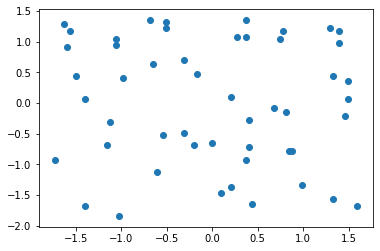

In [34]:
X2 = np.random.randint(0, 100, (50,2))
X2 = np.array(X2, dtype=float)
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])
plt.scatter(X2[:,0], X2[:,1])
plt.show()

### 对测试数据集如何归一化？
#### 测试数据是模拟真实环境
* 真实环境很有可能无法得到所有测试数据的均值和方差
* 对数据的归一化也是算法的一部分 (x_test - mean_train)/std_train

#### scikit-learn中的scaler
* 要保存训练数据集得到的均值和方差

In [35]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

#### scikit-learn中的standardScalaer

In [37]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
standardScaler.mean_

array([5.88571429, 3.05357143, 3.83125   , 1.21785714])

In [39]:
standardScaler.scale_

array([0.85720238, 0.43853013, 1.77190531, 0.74176603])

In [40]:
X_train_standard = standardScaler.transform(X_train)

In [41]:
X_test_standard = standardScaler.transform(X_test)

In [42]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_standard, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [43]:
knn_clf.score(X_test_standard, y_test)

0.9736842105263158

## 更多关于k邻近算法
* 解决分类问题
* 天然可以解决多分类问题
* 思想简单，效果强大

### 缺点
* 最大的缺点：效率低下
    * 如果训练集有m个样本，n个特征，则预测每一个新的数据，需要O(m*n)
* 缺点2：高度数据相关
* 缺点3：预测结果不具有可解释性
* 位数灾难
    * 随着维度的增加，“看似”相近的两个点之间的距离越来越大